iPhone Reviews Analysis Project

This notebook performs sentiment analysis on customer reviews of iPhones using:
- **Pandas** for data wrangling  
- **Seaborn** and **Matplotlib** for visualizations  
- **TextBlob** for sentiment analysis  

The project includes:  
Exploratory Data Analysis (EDA)  
 Text Preprocessing  
 Data Visualization  
 Sentiment Analysis  

dataset provided contains 3,062 customer reviews for an iPhone product, with details like:

Review information (reviewTitle, reviewDescription, ratingScore, isVerified)

Product metadata (variant, productAsin, variantAsin)(ASIN:Amazon Standard Identification Number)

Date and location info (country, date, reviewedIn)

Useful links (reviewUrl)

Step 1: Setup – Import Libraries & Load the Dataset

In [3]:
#data analysis
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#set style for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)




In [5]:
df=pd.read_csv('iphone.csv')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


Step 2: Exploratory Data Analysis (EDA)

to understand what kind of data we’re working with.



In [6]:
print("Shape of the Dataset:",df.shape)
print('Column Names:',df.columns.tolist())

Shape of the Dataset: (3062, 11)
Column Names: ['productAsin', 'country', 'date', 'isVerified', 'ratingScore', 'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn', 'variant', 'variantAsin']


In [7]:
#checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [8]:
#summary statistics for numeric columns
df.describe()

,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
#summary stats for all columns including texts
df.describe(include='all')

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
count,3062,3062,3062,3062,3062.000000,3062,2976,3046,3062,3062,3062
unique,7,7,789,2,NaN,2018,2297,2460,1255,86,99
top,B09G9D8KRQ,India,21-07-2024,True,NaN,Good,Good,https://www.amazon.in/gp/customer-reviews/RWKM...,Reviewed in India on 15 October 2023,Colour: BlueSize: 128 GB,B09G9HD6PD
freq,946,2229,17,2850,NaN,121,32,2,16,300,150
mean,NaN,NaN,NaN,NaN,3.758981,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.579033,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#missing values
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


In [11]:
#value counts
#ratings from 1-5
df['ratingScore'].value_counts()



,count
ratingScore,
5,1604
1,587
4,461
3,239
2,171


In [12]:
#verified purchase or not
df['isVerified'].value_counts()

,count
isVerified,
True,2850
False,212


In [13]:
#country from which most reviews come from
df['country'].value_counts()

,count
country,
India,2229
United States,579
Japan,158
United Arab Emirates,80
Mexico,11
Canada,4
Egypt,1


Step 3: Data Cleaning & Feature Engineering

Goals:
Convert date column to proper format

Create new columns: year, month

Fill missing values

Clean up inconsistent text if any

In [14]:
#convert date column to datetime format
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y')
#checking whether worked
df['date'].head()

,date
0,2024-08-11
1,2024-08-16
2,2024-05-14
3,2024-06-24
4,2024-05-18


In [15]:
#extracting year and month for time based analysis later
df['year']=df['date'].dt.year
df["month"]=df['date'].dt.month
#checking result
df[['date','year','month']].head()

,date,year,month
0,2024-08-11,2024,8
1,2024-08-16,2024,8
2,2024-05-14,2024,5
3,2024-06-24,2024,6
4,2024-05-18,2024,5


In [16]:
#filling missing values
#we have reviewDescription and reviewUrl with missing values
# df['reviewDescription'].fillna('No review text provided',inplace=True)
# df['reviewUrl'].fillna('No review URL provided',inplace=True)
df.fillna({'reviewDescription': 'No review text provided'},inplace=True)
df.fillna({'reviewUrl': 'No review URL provided'},inplace=True)
#checking if worked
df['reviewDescription'].isnull().sum()
df['reviewUrl'].isnull().sum()

np.int64(0)

In [17]:
#check everything for missing values
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,0
reviewUrl,0
reviewedIn,0
variant,0


Step 4: Data Visualization with Matplotlib & Seaborn


Goals:
Understand ratings, trends, and patterns visually

Use charts




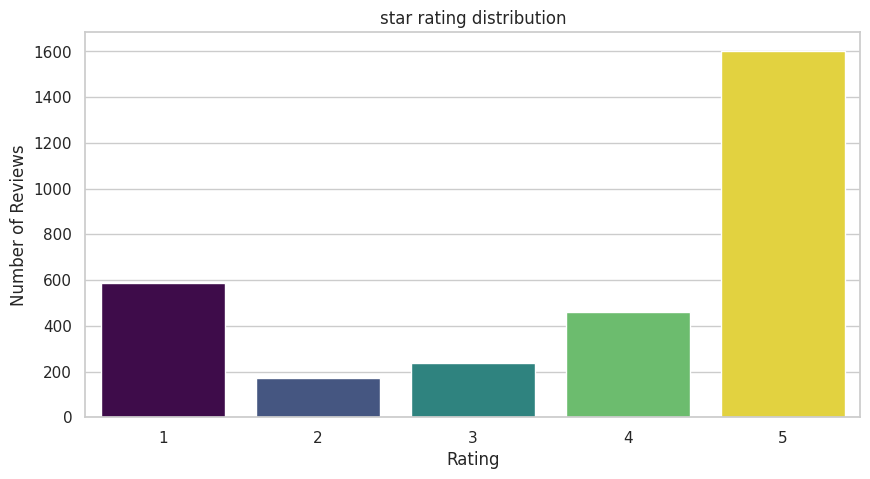

In [18]:
#count of each rating
sns.countplot(data=df,x='ratingScore',palette='viridis',hue='ratingScore',legend=False)
plt.title('star rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


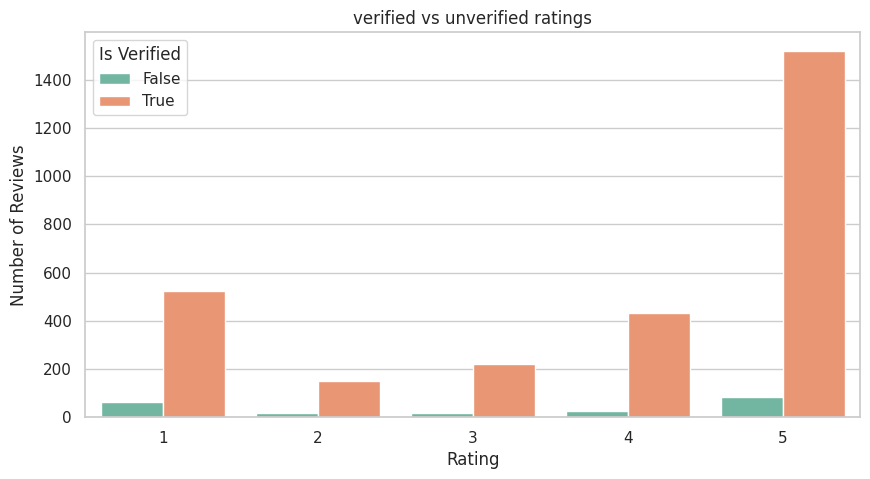

In [19]:
#verified and unverified purchases
#comparing rating distribution between verified and unverified
sns.countplot(data=df,x='ratingScore',hue='isVerified',palette='Set2')
plt.title('verified vs unverified ratings')
plt.xlabel('Rating')
plt.ylabel("Number of Reviews")
plt.legend(title='Is Verified')
plt.show()

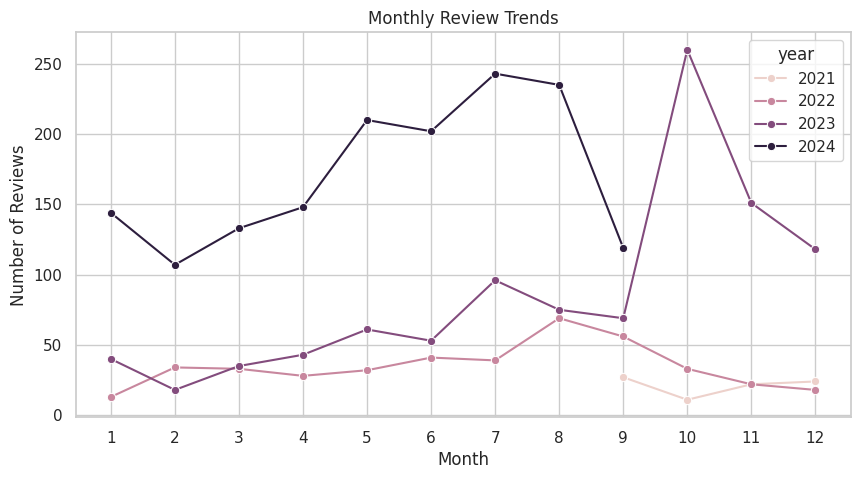

In [20]:
#monthly review trends
#group by year and month
monthly_trend=df.groupby(['year','month']).size().reset_index(name='reviewCount')

#plot
sns.lineplot(data=monthly_trend,x='month',y='reviewCount',hue='year',marker='o')
plt.title('Monthly Review Trends')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(range(1,13))
plt.show()

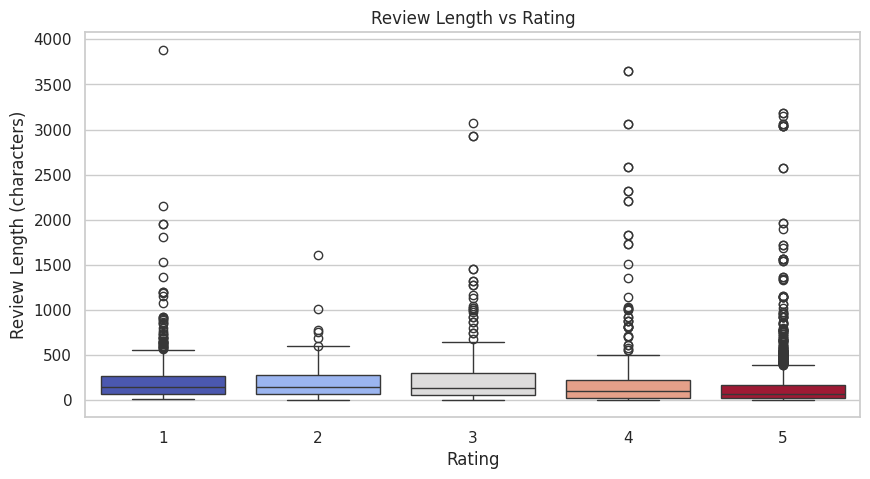

In [21]:
#review lenght vs rating
#to check whether there is connection between review length and rating given
#new column review text length
df['reviewLength']=df['reviewDescription'].apply(len)

#box plot to see spread
sns.boxplot(data=df,x='ratingScore',y='reviewLength',palette='coolwarm',legend=False,hue='ratingScore')
plt.title('Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()

Step 5: Text Analysis (Basic NLP)


Goals:
Clean and prepare the review text

Analyze most common words

Visualize them with a word cloud

Check sentiment (positive/negative)

In [22]:
#preprocessing the text
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

#adjust stopwords to keep important negations
custom_stopwords = set(stopwords.words('english'))-{'not','no','nor'}

#define a function to clean the text
def clean_text(text):
  text=text.lower()
  text=text.translate(str.maketrans('','',string.punctuation))
  tokens=word_tokenize(text)
  tokens=[word for word in tokens if word not in custom_stopwords]
  return ' '.join(tokens)

df['cleanedReview']=df['reviewDescription'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
#view some cleaned results
df[['reviewDescription','cleanedReview']].head()

,reviewDescription,cleanedReview
0,"Every thing is good about iPhones, there's not...",every thing good iphones theres nothing compar...
1,"It look so fabulous, I am android user switche...",look fabulous android user switched apple perf...
2,I tried to flip camera while recording but no ...,tried flip camera recording no facility added ...
3,100% genuine,100 genuine
4,Happy to get the iPhone 13 in Amazon offer,happy get iphone 13 amazon offer


In [24]:
df[['reviewDescription','cleanedReview']]

,reviewDescription,cleanedReview
0,"Every thing is good about iPhones, there's not...",every thing good iphones theres nothing compar...
1,"It look so fabulous, I am android user switche...",look fabulous android user switched apple perf...
2,I tried to flip camera while recording but no ...,tried flip camera recording no facility added ...
3,100% genuine,100 genuine
4,Happy to get the iPhone 13 in Amazon offer,happy get iphone 13 amazon offer
...,...,...
3057,Useless phon never buy this heat n useless cam...,useless phon never buy heat n useless camera p...
3058,iam not happy with this product why because ch...,iam not happy product charger not provided app...
3059,Good phone,good phone
3060,While charging mobile it's getting so hot even...,charging mobile getting hot even using mobile ...


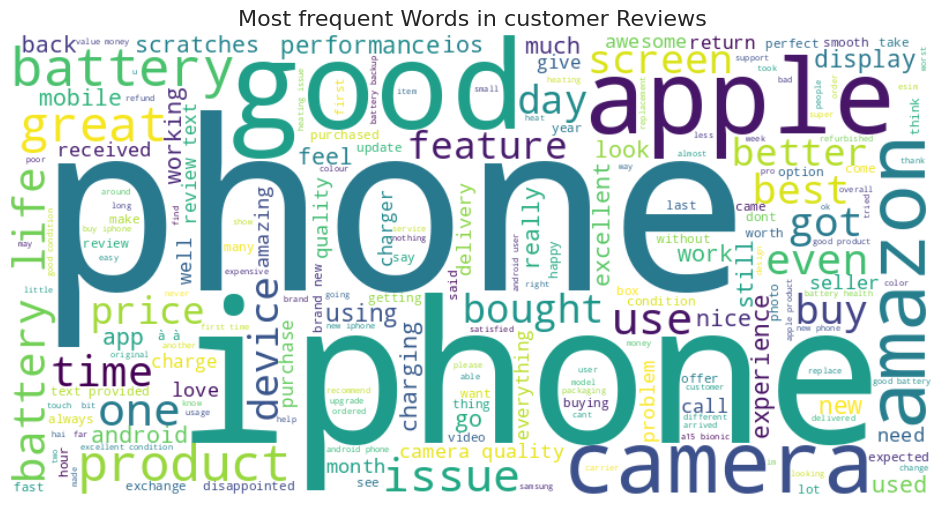

In [25]:
#create a word cloud from cleaned reviews
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#join all reviews into a single string
all_text=' '.join(df['cleanedReview'])

#create the word cloud
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_text)

#plot it
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent Words in customer Reviews',fontsize=16)
plt.show()

sentiment analysis with textBlob

What is Sentiment Analysis?

It means figuring out if a piece of text is:

Positive (happy review) +1 very +ve

Negative (complaint) -1 very -ve

Neutral (meh...) 0 neutral



In [26]:
from textblob import TextBlob

In [27]:
#function to get sentiment polarity
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

#apply the function to original reviews
df['sentiment']=df['reviewDescription'].apply(get_sentiment)

#to show few examples
df[['reviewDescription','sentiment']].head(10)

,reviewDescription,sentiment
0,"Every thing is good about iPhones, there's not...",0.183929
1,"It look so fabulous, I am android user switche...",0.424048
2,I tried to flip camera while recording but no ...,-0.088333
3,100% genuine,0.400000
4,Happy to get the iPhone 13 in Amazon offer,0.800000
5,5 star 👍,0.000000
6,"Great Product... Nothing to say, as the Name A...",0.700000
7,Good product 😀💯,0.700000
8,Nice product,0.600000
9,Excellent product,1.000000


 Step 5.4: Sentiment Score Visualization

goal:

Create a histogram of sentiment polarity

This helps to see the overall tone of customer reviews:

Are they mostly positive?

Are there many negatives?

Are reviews balanced?

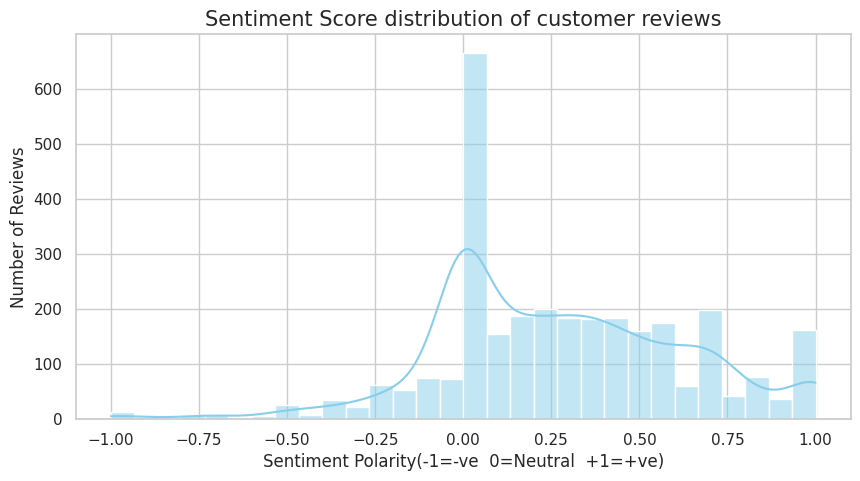

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#set the visual style
sns.set(style='whitegrid')

#create the histogram of sentiment scores

plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'],bins=30,kde=True,color='skyblue')
plt.title('Sentiment Score distribution of customer reviews',fontsize=15)
plt.xlabel('Sentiment Polarity(-1=-ve  0=Neutral  +1=+ve)',fontsize=12)
plt.ylabel('Number of Reviews',fontsize=12)
plt.show()

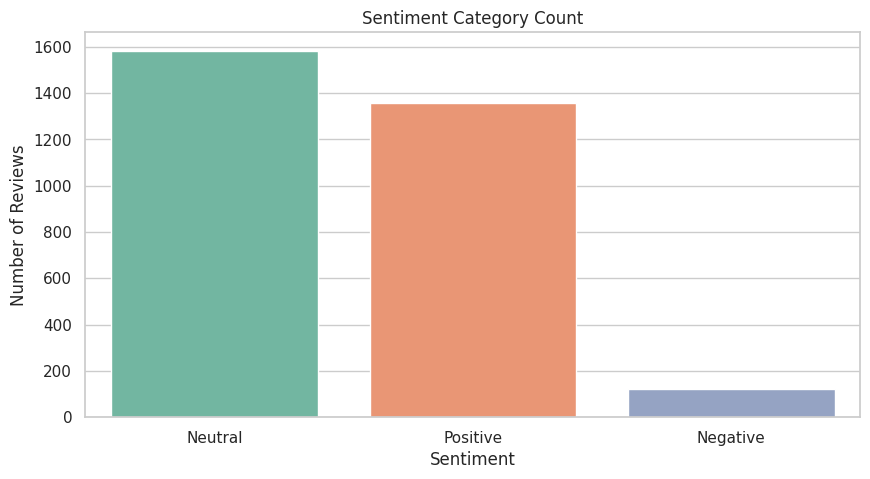

In [29]:
#sentiment categorization
def label_sentiment(score):
  if score>0.3:
    return 'Positive'
  elif score<-0.3:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment_label']=df['sentiment'].apply(label_sentiment)

#count plot
sns.countplot(data=df,x='sentiment_label',hue='sentiment_label',palette='Set2',legend=False)
plt.title('Sentiment Category Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [30]:
#save dataframe to csv
df.to_csv("iphone_reviews_with_sentiment.csv",index=False)


In [31]:
from google.colab import files
files.download('iphone_reviews_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Project Summary

 iPhone Reviews Sentiment Analysis and Visualization

Tools Used: Python, Pandas, NumPy, NLTK, TextBlob, Matplotlib, Seaborn, WordCloud
Platform: Google Colab


Description:

Collected and processed real-world iPhone customer reviews

Performed data cleaning, text preprocessing (tokenization, stopwords removal)

Applied TextBlob to compute sentiment polarity of each review

Visualized key insights using histograms, countplots, and word clouds

Exported clean, labeled dataset for future modeling or dashboard use

Outcome:

Built a beginner-to-intermediate-level text analysis pipeline

Learned foundational skills in NLP, EDA, and data visualization

Project is modular, extensible for future tools (like VADER, BERT, or dashboards)

In [32]:
import os

# Create a project directory
project_dir = "/content/iphone_reviews_project"
os.makedirs(project_dir, exist_ok=True)

# Save your final CSV file
df.to_csv(f"{project_dir}/iphone_reviews_with_sentiment.csv", index=False)

# Create a README.md
readme_content = """
# iPhone Review Sentiment Analysis

This project analyzes iPhone customer reviews using Natural Language Processing (NLP) and data visualization techniques.

##Tools Used
- Python, Pandas, NumPy
- TextBlob, NLTK
- Matplotlib, Seaborn, WordCloud

## Key Features
- Text cleaning and preprocessing
- Sentiment analysis (polarity scoring)
- Word cloud generation
- Data visualization with histograms and count plots

## Files
- `Iphone_Review_Analysis.ipynb` – Full Google Colab notebook
- `iphone_reviews_with_sentiment.csv` – Final processed dataset
"""

with open(f"{project_dir}/README.md", "w") as f:
    f.write(readme_content)

print("Files saved locally!")


Files saved locally!
